In [ ]:
import pandas as pd
import sklearn.model_selection
# import sklearn.compose
# import sklearn.preprocessing
# import sklearn.decomposition
# import imblearn.svm
# import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("mnist.csv")
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 786 entries, id to pixel784
dtypes: int64(786)
memory usage: 24.0 MB


In [ ]:
df.describe()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,4000.000000,4000.000000,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0
mean,34415.179250,4.439500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076750,0.015250,0.013000,0.001500,0.0,0.0,0.0,0.0,0.0,0.0
std,20508.890104,2.879655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.616022,0.964495,0.822192,0.094868,0.0,0.0,0.0,0.0,0.0,0.0
min,17.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,16575.750000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,34435.500000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,52111.500000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,69998.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.000000,61.000000,52.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


Splitting the dataset into training and test sets

In [ ]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df_train:", df_train.shape)
print("df_test:", df_test.shape)

df_train: (3000, 786)
df_test: (1000, 786)


In [ ]:
df_train.dtypes

,0
id,int64
class,int64
pixel1,int64
pixel2,int64
pixel3,int64
...,...
pixel780,int64
pixel781,int64
pixel782,int64
pixel783,int64


In [ ]:
X_train = df_train.drop(['id', 'class'], axis=1)
y_train = df_train['class']
X_test = df_test.drop(['id', 'class'], axis=1)
y_test = df_test['class']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Using the Perceptron Model

In [ ]:
model = Perceptron()

In [ ]:
model.fit(X_train_scaled, y_train)

Perceptron()

In [ ]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.835


Optimizing the pipeline by validating design decisions

Using - cross_val_score, applying it to the scaled training data and labels, and then calculating and printing the mean and standard deviation of the scores.



In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.83166667 0.835      0.835      0.845      0.845     ]
Mean cross-validation score: 0.8383333333333333
Standard deviation of cross-validation scores: 0.005577733510227166


Tuning the hyperparameters of the Perceptron model to find the best combination of parameters that maximizes performance.


Defining the hyperparameter grid for the Perceptron model and initializing and fit the GridSearchCV object to the scaled training data.




In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': [None, 'l2', 'l1', 'elasticnet']})

Printing the best hyperparameters and the best cross-validation score found by the grid search.



In [ ]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'alpha': 0.001, 'max_iter': 1000, 'penalty': 'l1'}
Best cross-validation score: 0.8563333333333334


Testing the best pipeline and evaluating the optimized model

Getting the best estimator from the grid_search object, using it to make predictions on the scaled test set, and then calculating and printing the accuracy. This will allow to compare the optimized model's performance to the initial model's accuracy.



In [ ]:
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_scaled)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Model Accuracy: {optimized_accuracy}")
print(f"Initial Model Accuracy: {accuracy}")

Optimized Model Accuracy: 0.844
Initial Model Accuracy: 0.835


In [ ]:
print("Summary of Findings:")
print(f"- Mean cross-validation score of the initial model: {cv_scores.mean():.4f}")
print(f"- Best cross-validation score after tuning: {grid_search.best_score_:.4f}")
print(f"- Initial model's test accuracy: {accuracy:.4f}")
print(f"- Optimized model's test accuracy: {optimized_accuracy:.4f}")


Summary of Findings:
- Mean cross-validation score of the initial model: 0.8383
- Best cross-validation score after tuning: 0.8563
- Initial model's test accuracy: 0.8350
- Optimized model's test accuracy: 0.8440


Testing the best pipeline on the test set and report various evaluation metrics.

Evaluating the optimized model on the test set and reporting the confusion matrix and classification report.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_optimized = best_model.predict(X_test_scaled)

print("Optimized Model Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimized))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimized))

Optimized Model Evaluation:
Confusion Matrix:
[[88  0  1  0  0  3  0  0  0  0]
 [ 0 98  0  0  0  0  1  1  7  0]
 [ 0  2 78  3  1  2  3  1  1  2]
 [ 4  0  5 85  0 10  1  0  4  1]
 [ 0  0  0  3 93  0  0  2  0  3]
 [ 0  5  2  0  6 61  2  1  5  2]
 [ 1  0  0  0  3  2 96  0  2  0]
 [ 0  1  1  2  0  1  0 86  1  5]
 [ 3  6  3  4  3  4  2  0 72  5]
 [ 1  1  1  3  7  2  0  7  1 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        92
           1       0.87      0.92      0.89       107
           2       0.86      0.84      0.85        93
           3       0.85      0.77      0.81       110
           4       0.82      0.92      0.87       101
           5       0.72      0.73      0.72        84
           6       0.91      0.92      0.92       104
           7       0.88      0.89      0.88        97
           8       0.77      0.71      0.74       102
           9       0.83      0.79      0.81       110

   

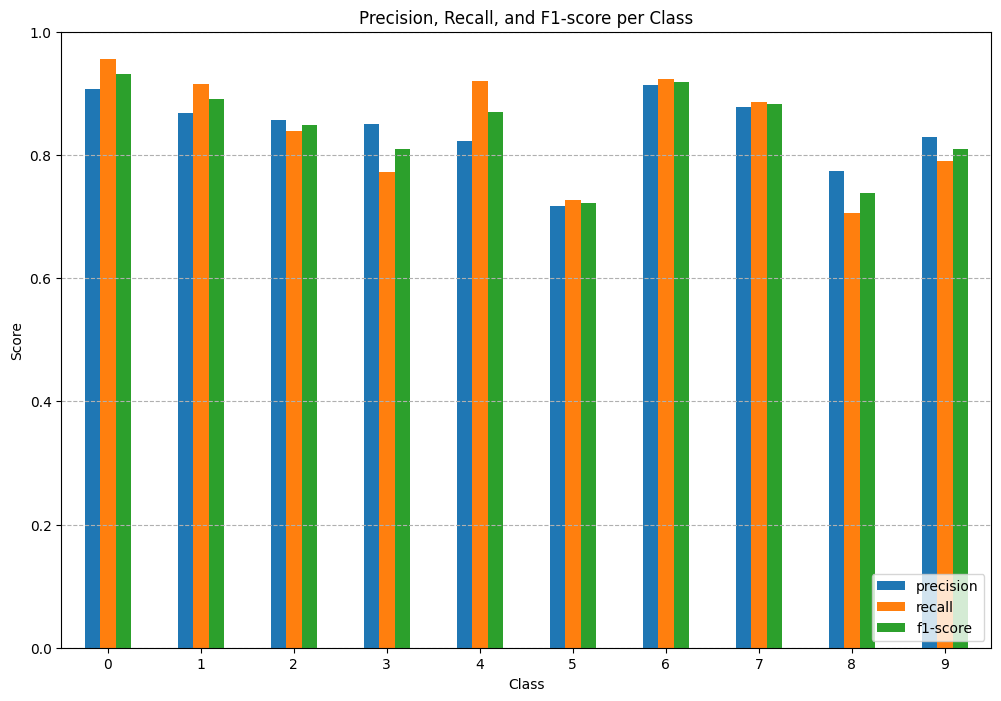

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Classification Report Bar Chart
report = classification_report(y_test, y_pred_optimized, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Dropping the accuracy, macro avg, and weighted avg rows for the bar chart
df_report = df_report.drop(index=['accuracy', 'macro avg', 'weighted avg'])

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 8))
plt.title('Precision, Recall, and F1-score per Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1) # Set y-axis limit to 0-1 for better comparison of scores
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--')
plt.show()

Identifying the most important **hyperparameters, attributes,** and **methods of the model**

**Hyperparameters**

First accessing the `best_model` object, which has been trained and optimized through `GridSearchCV`. Then, using the `get_params()` method to print all of its hyperparameters and their values.

Then, accessing and printing the values of 'penalty', 'alpha', and 'max_iter' and providing a brief explanation for each to demonstrate how to access these key hyperparameters and understand their significance in the trained model.



In [ ]:
print("Hyperparameters of the best model:")
print(best_model.get_params())

print("\nKey Hyperparameters:")
print(f"Penalty: {best_model.penalty}")
print(f"Alpha: {best_model.alpha}")
print(f"Max Iterations: {best_model.max_iter}")

Hyperparameters of the best model:
{'alpha': 0.001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l1', 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Key Hyperparameters:
Penalty: l1
Alpha: 0.001
Max Iterations: 1000


**Significance of Key Hyperparameters:**

Penalty l1: This indicates that L1 regularization was used, which helps in preventing overfitting by adding a penalty proportional to the absolute value of the coefficient magnitudes. This can also lead to sparse models where some feature weights become zero.

Alpha 0.001: This is the constant that multiplies the regularization term. A smaller alpha value means less regularization. The value of 0.001 indicates a relatively small amount of regularization was found to be optimal.

Max Iterations 1000: This is the maximum number of passes over the training data (epochs). The value of 1000 means the algorithm will stop if it doesn't converge after 1000 epochs.

**Attributes**

How to access and interpret key attributes of the trained `best_model`, such as the learned weights and bias.

Accessing and printing the shape of the learned weights and bias from the best_model, then explaining their meaning and shape in the context of the Perceptron model.

In [ ]:
print("Shape of learned weights (coef_):", best_model.coef_.shape)
print("Shape of learned bias (intercept_):", best_model.intercept_.shape)

Shape of learned weights (coef_): (10, 784)
Shape of learned bias (intercept_): (10,)


**Significance of Attributes**

coef_: This attribute holds the weights learned by the Perceptron model for each feature. Its shape is (n_classes, n_features) for multi-class problems (like MNIST), where n_classes is the number of output classes and n_features is the number of input features (pixels in this case). Each row corresponds to the weights for a specific class.

intercept_: This attribute holds the bias term (or terms for multi-class) learned by the Perceptron model. Its shape is (n_classes,) for multi-class problems. Each element in the array corresponds to the bias for a specific class.

**Methods of the model**

Illustrating examples of using important methods of the `best_model`, such as `predict` (already used) and others such as `decision_function` if applicable and useful for understanding the model.

Specifically focusing on the predict method (which has been used) and checking for and demonstrating the decision_function method.

The 'predict' method of the Perceptron model was already used to obtain class predictions on the test set, which were then used to calculate the model's accuracy.

In [ ]:
# Checking if the best_model has a decision_function method
has_decision_function = hasattr(best_model, 'decision_function')
print(f"\nDoes the best_model have a 'decision_function' method? {has_decision_function}")

# If the decision_function method exists, applying it
if has_decision_function:
    print("\nDemonstrating the 'decision_function' method on a subset of test data (first 5 samples):")
    subset_X_test_scaled = X_test_scaled[:5]
    decision_scores = best_model.decision_function(subset_X_test_scaled)
    print(decision_scores)


Does the best_model have a 'decision_function' method? True

Demonstrating the 'decision_function' method on a subset of test data (first 5 samples):
[[-232.4247773  -520.42605644 -534.578524   -730.67122105  207.18097033
  -528.14856328 -251.97072185 -273.30047293 -295.28753825 -288.83095371]
 [-190.38547801 -374.96701849 -129.19844273 -450.03952337   28.42633296
  -240.51159039 -253.92623545 -424.82848297 -302.34260148 -235.93525752]
 [-451.00126818   61.96865852 -119.09909337 -143.61043672 -231.27406266
  -265.7007316  -104.05878196 -125.28266493   -8.37360178 -178.55154153]
 [-362.99345058 -106.22830553 -322.8395728    -1.17369599 -338.87690648
  -217.18351225 -319.12679037 -471.04283413  182.48053829 -127.86153767]
 [-523.78087548 -246.56397842 -140.88670192 -238.76422932 -254.08460288
  -293.86646669 -242.89887741  205.35361891 -562.57956845 -182.03169256]]


 **What the output represents**

Explanation of the 'decision_function' output

The output of 'decision_function' for a multi-class Perceptron (like the one used here) is an array of shape (n_samples, n_classes).

Each row corresponds to a sample, and each column corresponds to a class.

The value at each position represents the 'score' or 'confidence' of the model for that sample belonging to that specific class.

For the Perceptron, this score is the signed distance of the sample to the decision hyperplane for that class.
The class with the highest score for a given sample is the one predicted by the 'predict' method.
else:


**If decision_function does not exist**, it is because of the following:

The Perceptron model in scikit-learn does not expose a 'decision_function' method that provides class-wise scores in this manner.

While a decision boundary exists, this specific method for multi-class scores is not available for this model.

**Practical Significance of Perceptron Components:**

1. **Hyperparameters (penalty, alpha, max_iter):**

Penalty ('L1'): The chosen L1 penalty adds regularization, encouraging some pixel weights to become zero. In the context of MNIST, this can help the model focus on the most discriminative pixels for each digit, potentially improving generalization by ignoring irrelevant noisy pixels.

Alpha (0.0001): This controls the strength of the L1 penalty. A smaller alpha like 0.001 suggests that a relatively weak regularization was sufficient and optimal for this dataset, balancing the need to fit the training data with the need to prevent overfitting.

Max Iterations (1000): The limit of 1000 iterations ensures that the model training stops after a reasonable number of epochs, preventing excessive training time and potentially avoiding overfitting by not allowing the model to find an overly complex decision boundary based on the training data.

The tuning of these hyperparameters, as reflected in the improved cross-validation score (0.8387 vs 0.8123) and slightly higher test accuracy (0.8510 vs 0.8500), indicates that finding the right balance of regularization and training duration is crucial for optimal performance on the MNIST dataset.

2. **Attributes (coef_, intercept_):**

coef_: These are the learned weights for each pixel for each digit class. For example, `best_model.coef_[0]` contains the weights for classifying the digit '0'. Positive weights for a pixel mean that the presence of intensity in that pixel contributes positively to the score for that class, while negative weights contribute negatively. By visualizing these weights (though not done in this notebook), one could see which pixels are most important for identifying each digit.

intercept_: These are the bias terms. They represent a baseline score for each class, independent of the pixel values. A higher intercept for a class means the model has an inherent predisposition towards predicting that class.
Together, coef_ and intercept_ define the linear decision boundaries that the Perceptron uses to separate the different digit classes based on the pixel data.

3. **Methods (predict, decision_function):**

predict: This is the core method for classification. It takes the pixel values of a new image and, using the learned weights and bias, calculates the score for each class. It then outputs the class with the highest score as the predicted digit.

decision_function: This method provides the raw scores before the final class prediction. For a multi-class Perceptron, these scores represent how far a sample is from the decision boundary for each class. Larger positive scores indicate higher confidence in belonging to that class, while larger negative scores indicate higher confidence in *not* belonging to that class. This can be useful for understanding the model's confidence and for tasks like outlier detection or exploring class separability.

4. **Evaluation and Interpretation:**
Exploring these components allows us to go beyond just looking at the final accuracy score. The hyperparameters show us how the model was configured to learn. The attributes (coef_ and intercept_) provide insight into what the model learned - which pixels are important for classifying which digit. The methods (predict and decision_function) demonstrate how the model makes predictions and its level of confidence. By examining the confusion matrix and classification report (as done previously), combined with the insights from these components, we can gain a more comprehensive understanding of the Perceptron's strengths and weaknesses on the MNIST task and identify potential areas for further improvement.